=== Sélection de l'instance ===
1 - 6X6.csv
2 - 11X11.csv
3 - 51X51.csv
4 - 101X101.csv
5 - 201X201.csv
6 - 501X501.csv
7 - 1001X1001.csv
8 - 1501X1501.csv
9 - 2001X2001.csv
Lancement 1 terminé : Temps du cycle = 890
Premier client du camion 1 : 1
Cycle du camion 1 :  1 -> 10 -> 19 -> 7 -> 11 -> 16 -> 38 -> 1
Temps total du camion 1 : 77

Premier client du camion 2 : 1
Cycle du camion 2 :  1 -> 32 -> 3 -> 6 -> 1
Temps total du camion 2 : 71

Premier client du camion 3 : 1
Cycle du camion 3 :  1 -> 31 -> 8 -> 50 -> 1
Temps total du camion 3 : 85

Premier client du camion 4 : 1
Cycle du camion 4 :  1 -> 28 -> 33 -> 42 -> 14 -> 4 -> 1
Temps total du camion 4 : 75

Premier client du camion 5 : 1
Cycle du camion 5 :  1 -> 45 -> 44 -> 43 -> 36 -> 18 -> 26 -> 21 -> 29 -> 46 -> 1
Temps total du camion 5 : 112

Premier client du camion 6 : 1
Cycle du camion 6 :  1 -> 20 -> 41 -> 12 -> 27 -> 48 -> 1
Temps total du camion 6 : 120

Premier client du camion 7 : 1
Cycle du camion 7 :  1 -> 25 -> 17 

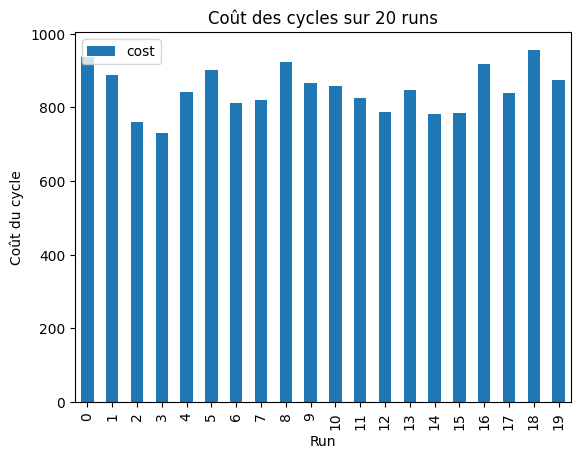


 === Statistiques globales ===
             cost     time_s
count   20.000000  20.000000
mean   847.800000   0.001228
std     61.510461   0.000187
min    731.000000   0.001128
25%    806.750000   0.001149
50%    843.500000   0.001171
75%    892.000000   0.001193
max    956.000000   0.001969

Coût moyen : 847.80
Écart-type : 61.51
Meilleur coût : 731.00
Pire coût : 956.00


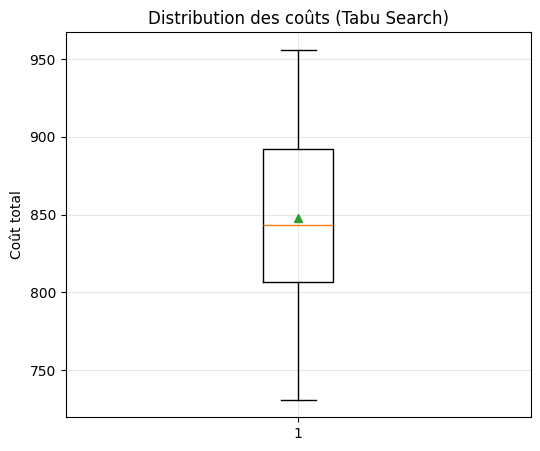

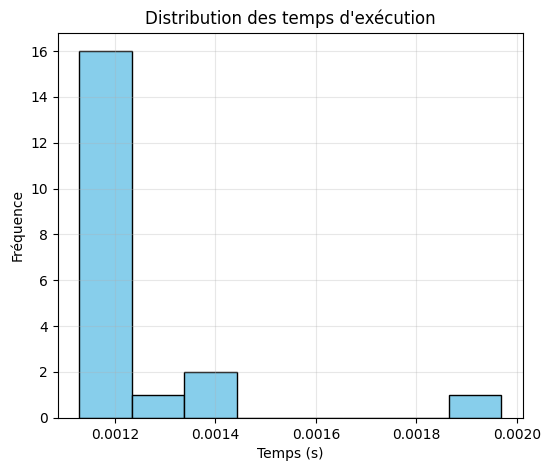

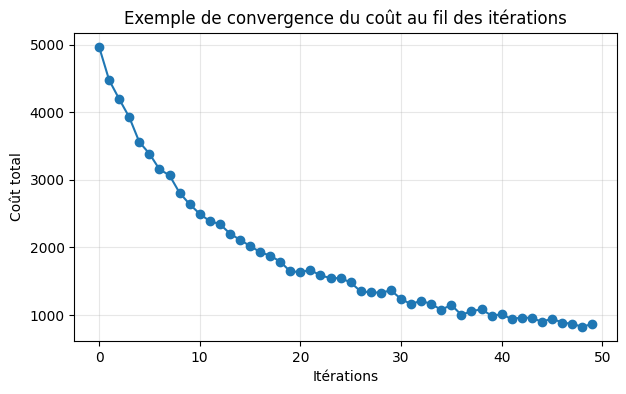


=== GAP par rapport à la solution optimale ===
    run  cost      gap_%
0     1   938 -96.600341
1     2   889 -96.777935
2     3   760 -97.245479
3     4   731 -97.350585
4     5   841 -96.951905
5     6   901 -96.734442
6     7   813 -97.053387
7     8   820 -97.028016
8     9   923 -96.654706
9    10   865 -96.864920
10   11   859 -96.886666
11   12   825 -97.009895
12   13   788 -97.143996
13   14   846 -96.933783
14   15   783 -97.162118
15   16   785 -97.154869
16   17   919 -96.669204
17   18   840 -96.955529
18   19   956 -96.535102
19   20   874 -96.832300

 Moyenne du gap : -96.93%


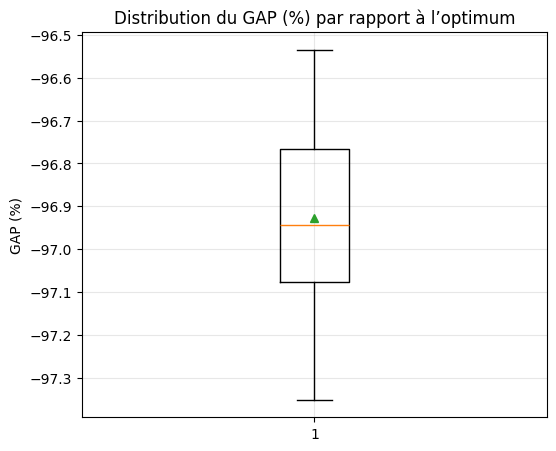

In [ ]:
import csv
import numpy as np
from collections import deque
import copy
import random
import time
import math

# === SWITCH POUR CHOISIR LE FICHIER CSV ===
print("=== Sélection de l'instance ===")
print("1 - 6X6.csv")
print("2 - 11X11.csv")
print("3 - 51X51.csv")
print("4 - 101X101.csv")
print("5 - 201X201.csv")
print("6 - 501X501.csv")
print("7 - 1001X1001.csv")
print("8 - 1501X1501.csv")
print("9 - 2001X2001.csv")
choix = input("Choisissez la matrice à utiliser (1-9) : ")

if choix == "1":
    csv_path = "instance/6X6.csv"
elif choix == "2":
    csv_path = "instance/11X11.csv"
elif choix == "3":
    csv_path = "instance/51X51.csv"
elif choix == "4":
    csv_path = "instance/101X101.csv"
elif choix == "5":
    csv_path = "instance/201X201.csv"
elif choix == "6":
    csv_path = "instance/501X501.csv"
elif choix == "7":
    csv_path = "instance/1001X1001.csv"
elif choix == "8":
    csv_path = "instance/1501X1501.csv"
elif choix == "9":
    csv_path = "instance/2001X2001.csv"
else:
    csv_path = "instance/6X6.csv"

# === CHOIX DU NOMBRE DE CAMIONS ===
try:
    nbTrucks = int(input("Nombre de camions à utiliser : "))
except:
    nbTrucks = 10  # valeur par défaut

# === Chargement de la matrice choisie ===
matrix = np.loadtxt(csv_path, delimiter=",", dtype=int)
depot = 0

def voisinMinPoid(matrix, listeClient, cur):
    poidMinTrajet = 0
    nextVoisin = -1
    for i in listeClient:
        if matrix[cur][i] > 0 and (poidMinTrajet == 0 or matrix[cur][i] < poidMinTrajet):
            nextVoisin = i
            poidMinTrajet = matrix[cur][i]
    return nextVoisin, poidMinTrajet

def voisinsClientGraphematrix(matrix, sommet):
    return [i for i in range(len(matrix)) if matrix[sommet][i] > 0]

def poidCycle():
    return sum(truckCycles[0])

def recherche_tabou_cycle(matrix, start):
    matrix_copy = copy.deepcopy(matrix)
    tabou = deque(maxlen=len(matrix))
    tabou.append(start)
    
    for i in range(nbTrucks):
        tabou.append(truckCycles[1][i][-1])

    while len(tabou) < len(matrix):
        truckAtMove = truckCycles[0].index(min(truckCycles[0]))
        cur = truckCycles[1][truckAtMove][-1]

        voisins = voisinsClientGraphematrix(matrix_copy, cur)
        candidats = [v for v in voisins if v not in tabou]

        if not candidats:
            break

        voisin, temps = voisinMinPoid(matrix_copy, candidats, cur)

        matrix_copy[cur][voisin] = 0
        matrix_copy[voisin][cur] = 0

        truckCycles[1][truckAtMove].append(voisin)
        truckCycles[0][truckAtMove] += temps
        tabou.append(voisin)

    # Retour au dépôt
    for i in range(nbTrucks):
        last_visited = truckCycles[1][i][-1]
        truckCycles[1][i].append(depot)
        truckCycles[0][i] += matrix[last_visited][depot]

def tabou_multi_start(matrix, nb_lancements=20):
    tempsMeilleurCycle = float('inf')
    goodI = -1
    bestTime = None

    for i in range(nb_lancements):
        global truckCycles
        truckCycles = [
            [0] * nbTrucks,
            [[] for _ in range(nbTrucks)]
        ]

        for j in range(nbTrucks):
            truckCycles[1][j] = [depot]
            while True:
                firstNeighbor = random.randint(1, len(matrix)-1)
                if not any(firstNeighbor in cycle for cycle in truckCycles[1]):
                    truckCycles[1][j].append(firstNeighbor)
                    truckCycles[0][j] = matrix[depot][firstNeighbor]
                    break

        recherche_tabou_cycle(matrix, depot)
        total = poidCycle()
        print(f"Lancement {i+1} terminé : Temps du cycle = {total}")

        for k in range(nbTrucks):
            print(f"Premier client du camion {k+1} : {truckCycles[1][k][0]+1}")
            print(f"Cycle du camion {k+1} : ", " -> ".join(str(x+1) for x in truckCycles[1][k]))
            print(f"Temps total du camion {k+1} : {truckCycles[0][k]}")
            print()

        if total < tempsMeilleurCycle:
            tempsMeilleurCycle = total
            goodI = i
            bestTime = [
                truckCycles[0].copy(),
                [cycle.copy() for cycle in truckCycles[1]]
            ]
            print(f"→ Nouveau meilleur cycle sa
    vegardé ! Lancement {i+1}.\n")

    return tempsMeilleurCycle, goodI, bestTime


# === Lancement principal ===
start_time = time.time()
tempsMeilleurCycle, goodI, bestTime = tabou_mui_start(matrix)
execution_time_ms = (time.time() - start_time) 1000

print("\n=== Meilleur cycle trouvé ===")
print("Lancement n°", goodI+1, "  Temps du cyc :", tempsMeilleurCycle)
for i in range(nbTrucks):
    print(f"Cycle du camion {i+1} : ", " -> ".jin(str(x+1) for x in bestTime[1][i]))
    print(f"Temps total du camion {i+1} : {bestime[0][i]}\n")

print("Temps d'exécution :", round(execution_time_ms, 2), "ms")


# === Fonctions de lecture et simulation (inchangées) ===

def lire_matrice_csv(filename):
    matrice = []
    with open(filename, newline='') as f:
        lecteur = csv.reader(f)
        for ligne in lecteur:
            valeurs = [int(float(x)) for x in ligne if x.strip() != ""]
            if valeurs:
                matrice.append(valeurs)
    return matrice

def generer_facteur_bouchon(heure):
    seed_value = hash(f"bouchon_{heure}") % (2**32)
    random.seed(seed_value)
    intensite = 0.5 + 0.5 * math.sin((heure - 8) / 24 * 2 * math.pi)
    facteur = 2.0 * intensite  
    if facteur <= 0:
        facteur = 1
    return facteur

def facteurs_variation(matrice, pourcentage):
    n = len(matrice)
    toutes_les_routes = [(i, j) for i in range(n) for j in range(i + 1, n) if matrice[i][j] != 0]
    nb_a_modifier = int(len(toutes_les_routes) * pourcentage)
    routes_selectionnees = random.sample(toutes_les_routes, nb_a_modifier)
    
    for i, j in routes_selectionnees:
        p = random.uniform(-0.3, 0.3)
        nouvelle_valeur = matrice[i][j] * (1 + p)
        matrice[i][j] = matrice[j][i] = max(1, int(round(nouvelle_valeur)))
    
    return routes_selectionnees

def cout_effectif(matrice, i, j, heure):
    base = matrice[i][j]
    if base == 0:
        return 0
    facteur_bouchon = generer_facteur_bouchon(heure)
    cout = base * facteur_bouchon 
    return max(1, int(round(cout, 0)))

def simulation_journee(matrice, nom_fichier):
    print(f"\n=== Simulation sur {nom_fichier} ===")
    heures = list(range(0, 25, 4))
    for h in heures:
        facteur = generer_facteur_bouchon(h)
        cout_05 = cout_effectif(matrice, 0, 5, h)
        print(f"Heure {h:2d}h | Facteur bouchon: {facteur:.2f} | Coût 0->5: {cout_05}")

# === Partie bouchons ===

def creer_fichiers_avec_bouchons():
    matrix_instances = ['6X6.csv']
    heures = [8, 12, 20]

    for instance in matrix_instances:
        print(f"\n{'='*50}")
        print(f"Traitement de {instance}")
        print(f"{'='*50}")

        chemin_original = f"instance/{instance}"
        try:
            matrice_base = lire_matrice_csv(chemin_original)
            n = len(matrice_base)
        except FileNotFoundError:
            print(f"Fichier {chemin_original} non trouvé")
            continue

        for heure in heures:
            nom_sortie = f"matrice/{instance.replace('.csv', '')}_{heure}h.csv"
            print(f"\nCréation de {nom_sortie}...")

            matrice_copie = copy.deepcopy(matrice_base)
            facteur_global = generer_facteur_bouchon(heure)

            proportion_routes_affectees = 0.3
            routes_affectees = set()

            for i in range(n):
                for j in range(i + 1, n):
                    if random.random() < proportion_routes_affectees:
                        routes_affectees.add((i, j))

            for i in range(n):
                for j in range(i + 1, n):
                    if (i, j) in routes_affectees:
                        variation_locale = random.uniform(0.8, 1.4)
                        facteur_total = facteur_global * variation_locale
                        nouvelle_valeur = int(round(matrice_base[i][j] * facteur_total))
                        matrice_copie[i][j] = matrice_copie[j][i] = nouvelle_valeur
                    else:
                        matrice_copie[i][j] = matrice_copie[j][i] = int(matrice_base[i][j])

            with open(nom_sortie, 'w', newline='') as f:
                writer = csv.writer(f)
                writer.writerows(matrice_copie)

            print(f"✓ Fichier créé : {nom_sortie}")


def test_bouchons():
    matrice_originale = lire_matrice_csv("instance/6X6.csv")
    print("\n2. Simulation sur 24h...")
    simulation_journee(matrice_originale, "6X6.csv")
    print("\n3. Création des fichiers avec bouchons...")
    creer_fichiers_avec_bouchons()
    print("\n" + "=" * 50)
    print("🎉 TEST BOUCHONS TERMINÉ !")
    print("3 fichiers créés dans le dossier 'matrice/'")
    print("=" * 50)


def verifier_modifications():
    print("🔍 VÉRIFICATION DES MODIFICATIONS")
    print("=" * 50)
    random.seed(42)
    matrice_test = lire_matrice_csv("instance/6X6.csv")
    n = len(matrice_test)
    
    routes_non_nulles_original = 0
    for i in range(n):
        for j in range(i + 1, n):
            if matrice_test[i][j] != 0:
                routes_non_nulles_original += 1
    print(f"Routes non-nulles originales: {routes_non_nulles_original}")
    
    for heure in [8, 12, 20]:
        print(f"\n--- Heure {heure}h ---")
        matrice_copie = copy.deepcopy(matrice_test)
        random.seed(hash(f"test_{heure}") % (2**32))
        modifications = facteurs_variation(matrice_copie, 0.3)
        routes_modifiees = 0
        for i in range(n):
            for j in range(i + 1, n):
                if matrice_copie[i][j] != matrice_test[i][j]:
                    routes_modifiees += 1
        print(f"Routes modifiées comptées: {routes_modifiees}")
        print(f"Modifications annoncées: {len(modifications)}")
        print(f"COHÉRENT: {routes_modifiees == len(modifications)}")


# === Exécution finale ===
verifier_modifications()
test_bouchons()
